<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 160.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 186.8 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 163.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 166.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 132.8 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-05 09:22:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.7MB/s    in 2.6s    

2025-08-05 09:22:12 (57.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [35]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [36]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [37]:
import sqlite3
conn = sqlite3.connect("survey-data.sqlite")
df.to_sql("main", conn, if_exists="replace", index=False)


65437

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



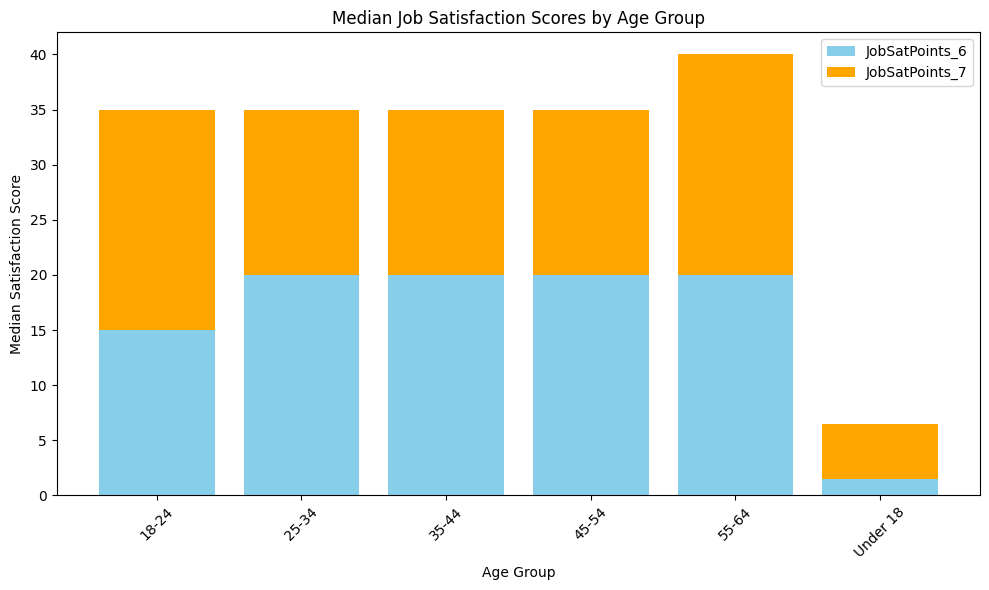

In [11]:
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL 
  AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

import random
def map_age_group(age_str):
    try:
        if '-' in age_str:
            age_str = age_str.replace(' years old', '').strip()
            low, high = age_str.split('-')
            return f"{low.strip()}-{high.strip()}"
        elif 'Under' in age_str:
            return 'Under 18'
        elif '65 or older' in age_str:
            return '65+'
        else:
            return None
    except:
        return None

df['AgeGroup'] = df['Age'].apply(map_age_group)

df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

median_scores = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

median_scores = median_scores.sort_index() 

plt.figure(figsize=(10, 6))
plt.bar(median_scores.index, median_scores['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(median_scores.index, median_scores['JobSatPoints_7'], bottom=median_scores['JobSatPoints_6'], label='JobSatPoints_7', color='orange')
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_299/2045893232.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


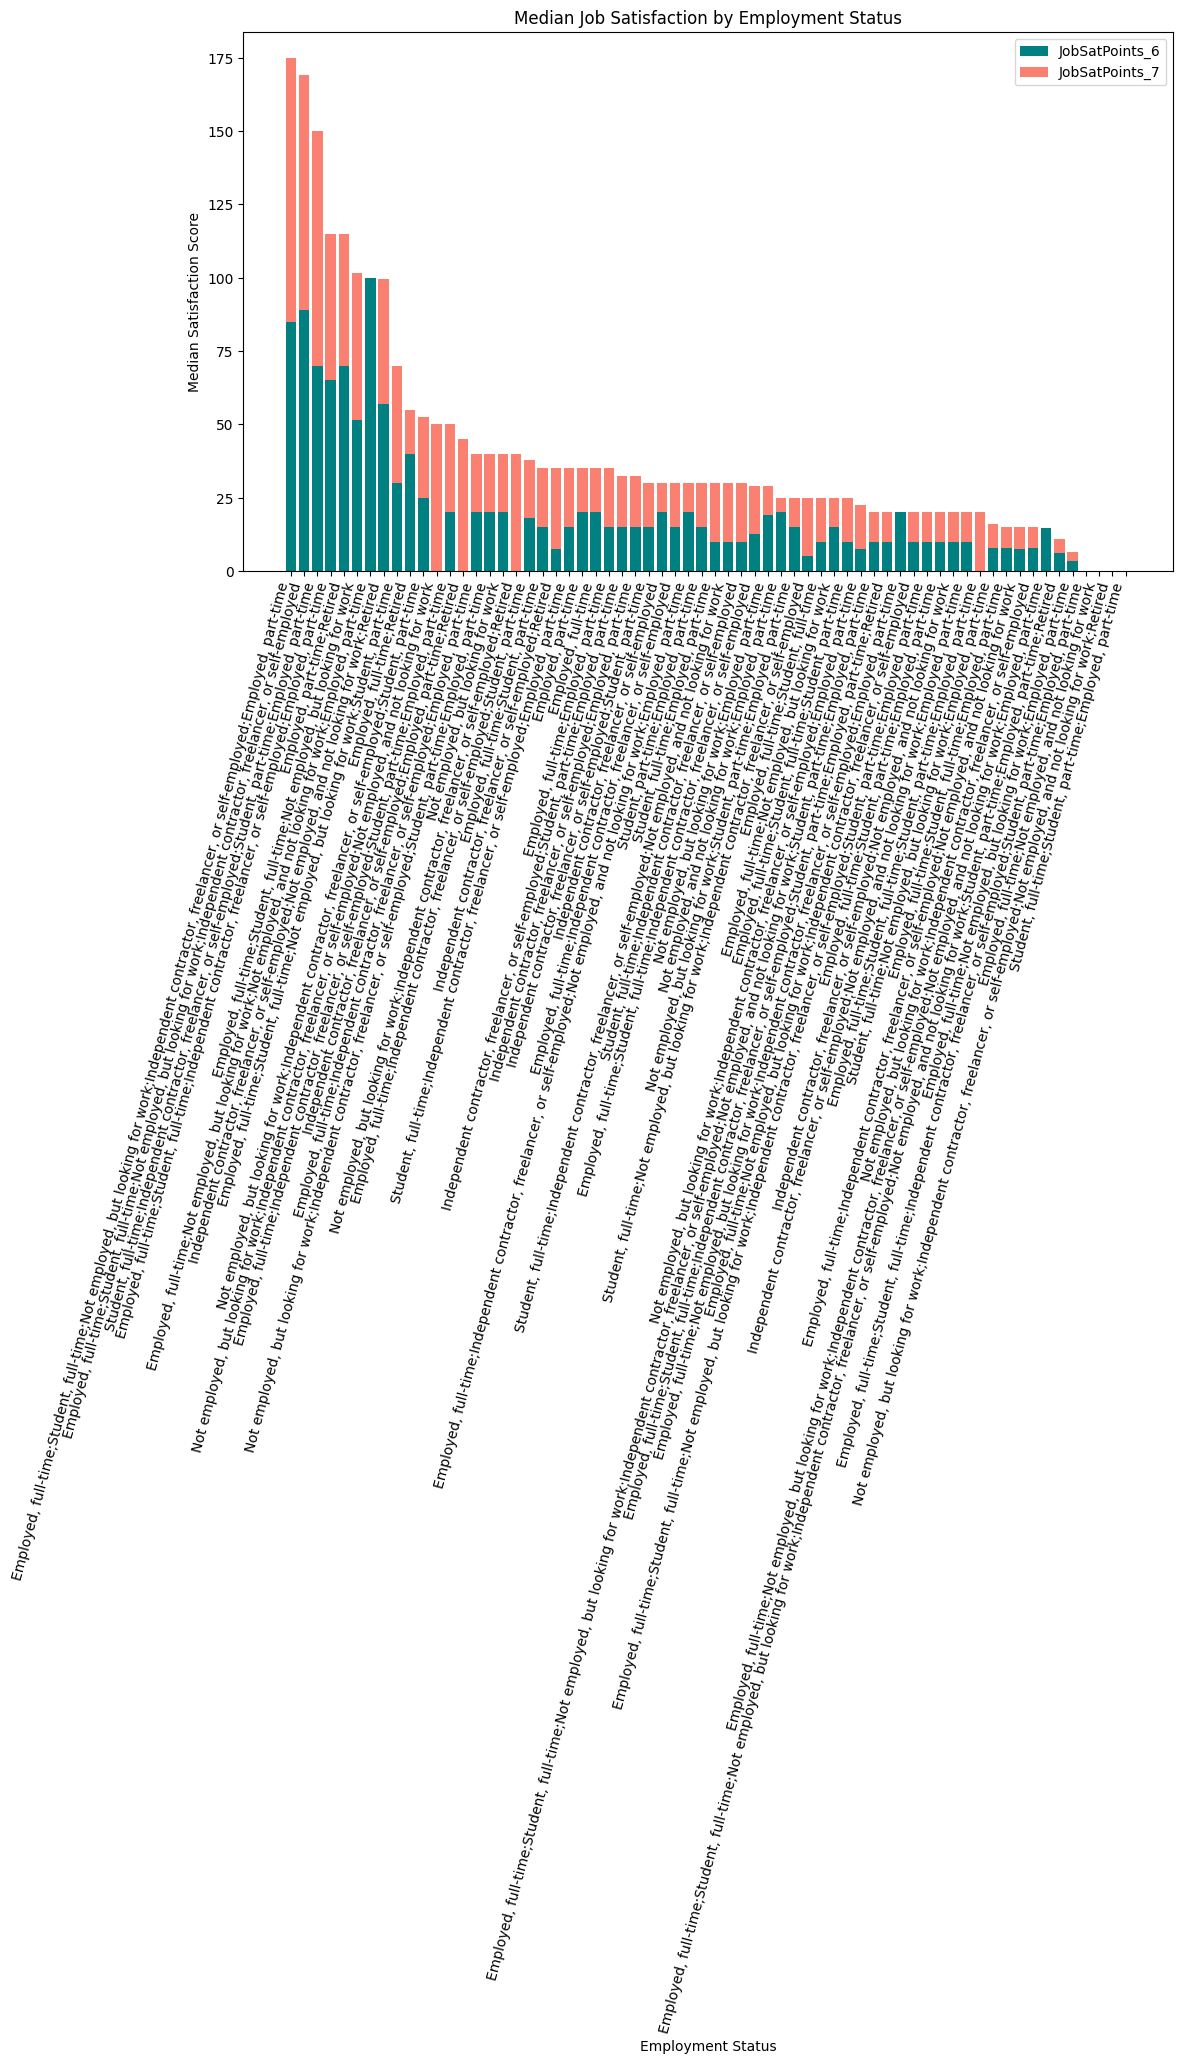

In [12]:
query = """
SELECT Employment, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Employment IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL 
  AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

satisfaction_by_employment = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

satisfaction_by_employment['Total'] = satisfaction_by_employment['JobSatPoints_6'] + satisfaction_by_employment['JobSatPoints_7']
satisfaction_by_employment = satisfaction_by_employment.sort_values('Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(12, 7))
plt.bar(satisfaction_by_employment.index, satisfaction_by_employment['JobSatPoints_6'], label='JobSatPoints_6', color='teal')
plt.bar(
    satisfaction_by_employment.index,
    satisfaction_by_employment['JobSatPoints_7'],
    bottom=satisfaction_by_employment['JobSatPoints_6'],
    label='JobSatPoints_7',
    color='salmon'
)

plt.title('Median Job Satisfaction by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=75, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [18]:

query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL 
  AND ConvertedCompYearly IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
import random

def map_age_random(age_str):
    try:
        if '-' in age_str:
            age_str = age_str.replace(' years old', '').strip()
            low, high = age_str.split('-')
            return random.randint(int(low.strip()), int(high.strip()))
        elif 'Under' in age_str:
            return random.randint(10, 17)
        elif '65 or older' in age_str:
            return random.randint(65, 75)
        else:
            return None
    except:
        return None

random.seed(42)
df['AgeMapped'] = df['Age'].apply(map_age_random)

df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df_filtered = df[(df['AgeMapped'] >= 30) & (df['AgeMapped'] <= 35)].dropna()

median_comp = df_filtered['ConvertedCompYearly'].median()
median_sat = df_filtered['JobSatPoints_6'].median()

labels = ['Age Group: 30–35']
comp_values = [median_comp]
sat_values = [median_sat]


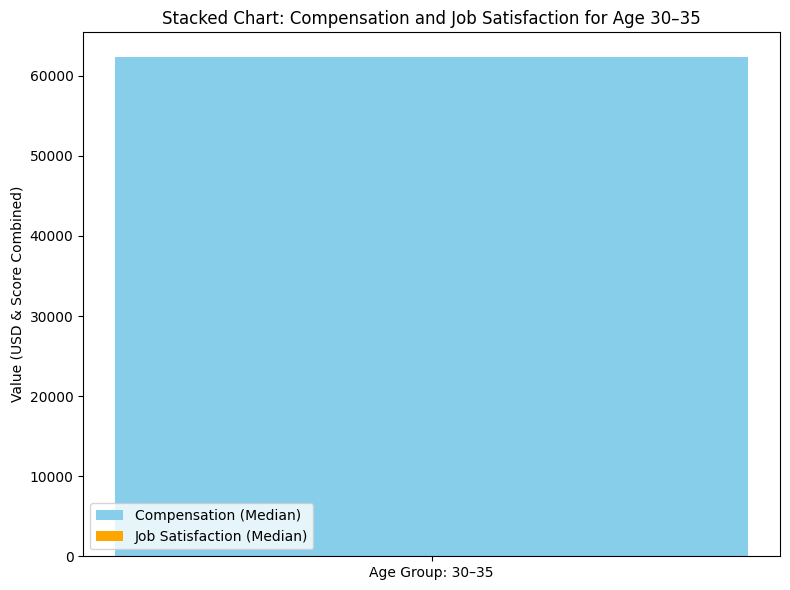

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(labels, comp_values, label='Compensation (Median)', color='skyblue')
plt.bar(labels, sat_values, bottom=comp_values, label='Job Satisfaction (Median)', color='orange')

plt.title('Stacked Chart: Compensation and Job Satisfaction for Age 30–35')
plt.ylabel('Value (USD & Score Combined)')
plt.legend()
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


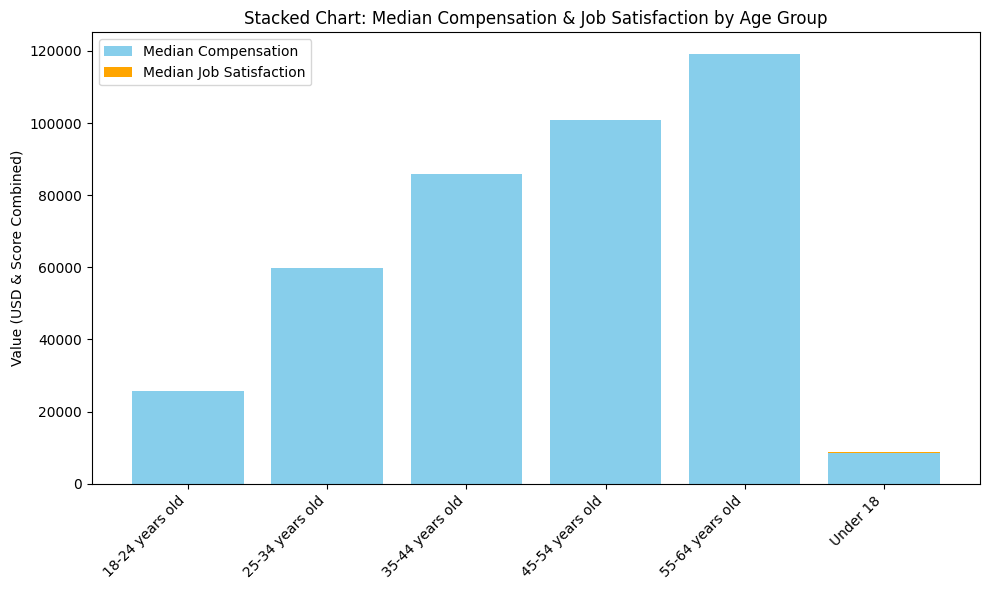

In [21]:

query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL 
  AND ConvertedCompYearly IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)




df['AgeGroup'] = df['Age'].apply(map_age_group)


df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeGroup'])


grouped = df_clean.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median().reset_index()
grouped = grouped.sort_values('AgeGroup') 



plt.figure(figsize=(10, 6))
plt.bar(grouped['AgeGroup'], grouped['ConvertedCompYearly'], label='Median Compensation', color='skyblue')
plt.bar(grouped['AgeGroup'], grouped['JobSatPoints_6'], bottom=grouped['ConvertedCompYearly'], label='Median Job Satisfaction', color='orange')

plt.title('Stacked Chart: Median Compensation & Job Satisfaction by Age Group')
plt.ylabel('Value (USD & Score Combined)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


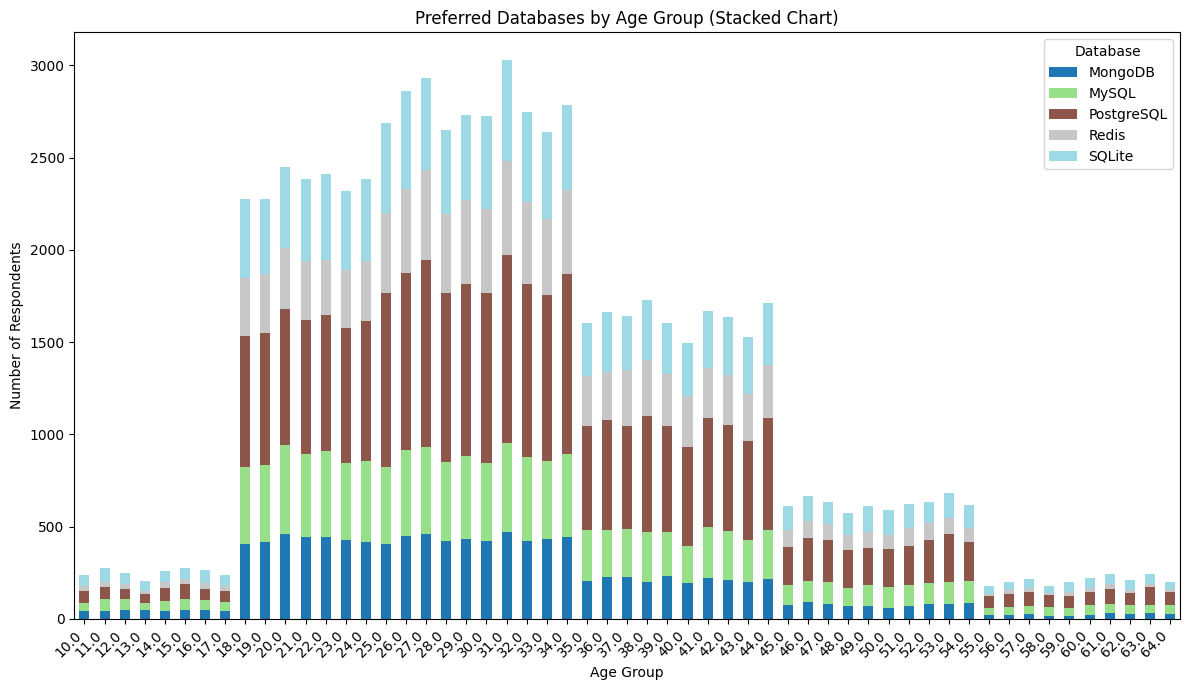

In [22]:
query = """
SELECT Age, DatabaseWantToWorkWith
FROM main
WHERE Age IS NOT NULL AND DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
random.seed(42)
df['AgeGroup'] = df['Age'].apply(map_age_random)

df_exp = df.assign(Database=df['DatabaseWantToWorkWith'].str.split(';')).explode('Database')
df_exp['Database'] = df_exp['Database'].str.strip()

top_5_dbs = df_exp['Database'].value_counts().nlargest(5).index
df_filtered = df_exp[df_exp['Database'].isin(top_5_dbs)]

pivot_df = df_filtered.pivot_table(index='AgeGroup', columns='Database', aggfunc='size', fill_value=0)

pivot_df = pivot_df.reindex(index=sorted(pivot_df.index))

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Preferred Databases by Age Group (Stacked Chart)')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Database')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


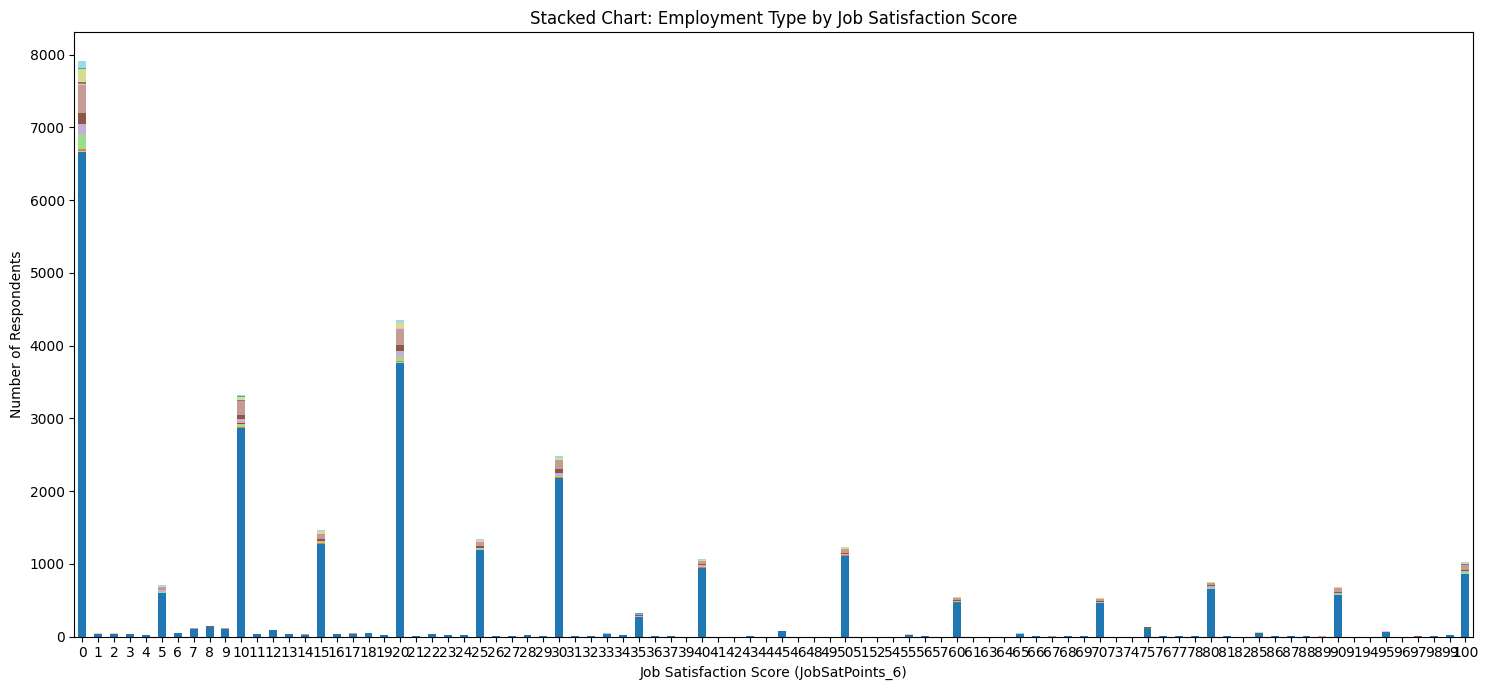

In [27]:
query = """
SELECT Employment, JobSatPoints_6
FROM main
WHERE Employment IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['JobSatPoints_6'])
df['JobSatPoints_6'] = df['JobSatPoints_6'].astype(int)
pivot_df = df.pivot_table(
    index='JobSatPoints_6', 
    columns='Employment', 
    aggfunc='size', 
    fill_value=0
)
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20',legend=False)
plt.title('Stacked Chart: Employment Type by Job Satisfaction Score')
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [28]:
query = """
SELECT Age, LanguageAdmired
FROM main
WHERE Age IS NOT NULL AND LanguageAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
random.seed(42)
df['AgeGroup'] = df['Age'].apply(map_age_group)

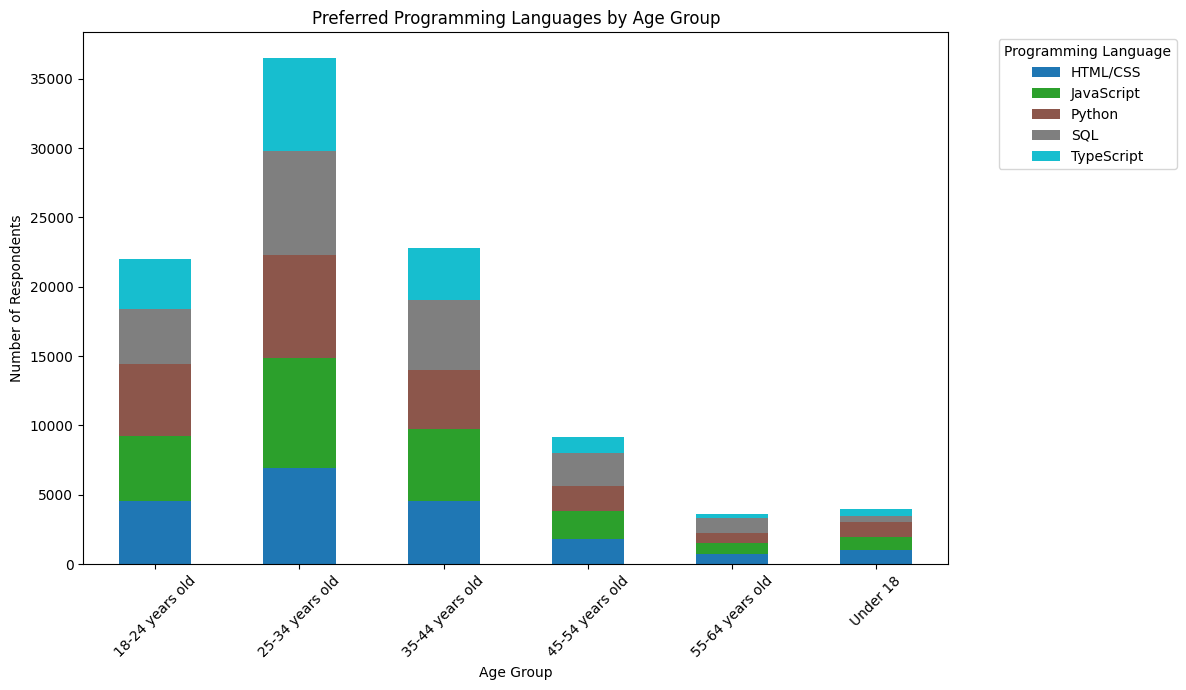

In [29]:
df = df.assign(Language=df['LanguageAdmired'].str.split(';')).explode('Language')
top_languages = df['Language'].value_counts().nlargest(5).index
df_filtered = df[df['Language'].isin(top_languages)]
pivot_df = df_filtered.pivot_table(
    index='AgeGroup',
    columns='Language',
    aggfunc='size',
    fill_value=0
).sort_index()
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab10')
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


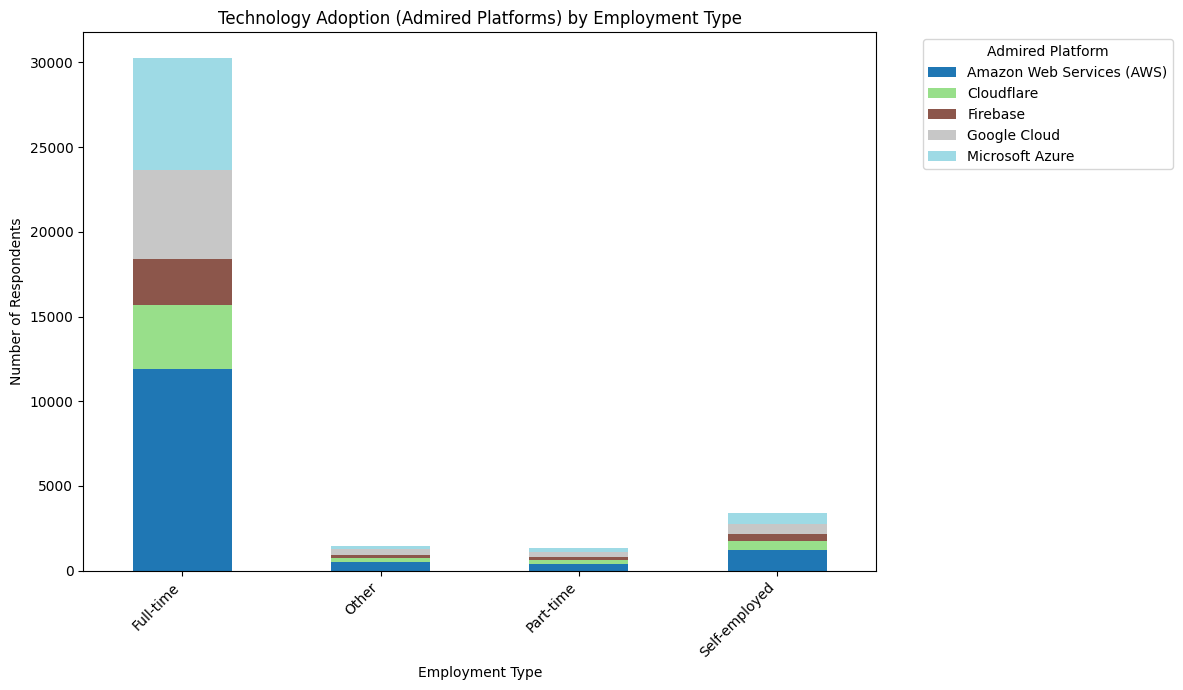

In [39]:
query = """
SELECT Employment, PlatformAdmired
FROM main
WHERE Employment IS NOT NULL AND PlatformAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
def simplify_employment(emp):
    if 'full-time' in emp.lower():
        return 'Full-time'
    elif 'part-time' in emp.lower():
        return 'Part-time'
    elif 'self-employed' in emp.lower() or 'freelancer' in emp.lower():
        return 'Self-employed'
    elif 'student' in emp.lower():
        return 'Other'
    elif 'retired' in emp.lower():
        return 'Other'
    elif 'not employed' in emp.lower():
        return 'Other'
    else:
        return 'Other'

df['EmploymentGroup'] = df['Employment'].apply(simplify_employment)
df = df.assign(Platform=df['PlatformAdmired'].str.split(';')).explode('Platform')
top_platforms = df['Platform'].value_counts().nlargest(5).index
df_filtered = df[df['Platform'].isin(top_platforms)]
pivot_df = df_filtered.pivot_table(
    index='EmploymentGroup',
    columns='Platform',
    aggfunc='size',
    fill_value=0
).sort_index()
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20'
)
plt.title('Technology Adoption (Admired Platforms) by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Admired Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
conn.close()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
